<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/Anomaly_detection_%7C_dealing_with_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import style
style.use('ggplot')

In [4]:
from google.colab import files
file = files.upload()

Saving BankChurners.csv to BankChurners.csv


In [6]:
df = pd.read_csv("BankChurners.csv")

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N_B_Flag1,Naive_B_Flag2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
df.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900


## **Renaming columns using a mapping:**
`df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]});`
`df.rename(columns={"A": "a", "B": "c"})`
[Reference>>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

In [10]:
df.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "N_B_Flag2"}, inplace=True)

In [11]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N_B_Flag1,N_B_Flag2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# PCA Dimentionality reduction to prject scatter data on 2D plot to find outliers

**Seperating Numerical columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
nm_df = df.iloc[:,[2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20, 21]]

In [13]:
nm_df

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N_B_Flag1
0,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,40,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191
10123,41,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270
10124,44,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880
10125,30,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710


In [14]:
df['Dependent_count'].unique()

array([3, 5, 4, 2, 0, 1])

In [15]:
df['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

Defining Target Y

In [32]:
Y = df.loc[:, 'Dependent_count'].values # all rows in col: Dependent_count

## To prepare data for PCA we hve to scale it first:

Although pca center the dataset by itself, but it is always a good practice
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [17]:
scalar = StandardScaler()
scalar.fit(nm_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scale_nm_df = scalar.transform(nm_df)

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

In [19]:
print(scalar.mean_)
print(scale_nm_df)

[4.63259603e+01 3.59284092e+01 3.81258023e+00 2.34116718e+00
 2.45531747e+00 8.63195370e+03 1.16281406e+03 7.46913964e+03
 7.59940654e-01 4.40408630e+03 6.48586946e+01 7.12222376e-01
 2.74893552e-01 1.59997464e-01]
[[-1.65405580e-01  3.84620878e-01  7.63942609e-01 ...  3.83400260e+00
  -7.75882235e-01 -4.37753814e-01]
 [ 3.33570383e-01  1.01071482e+00  1.40730617e+00 ...  1.26085729e+01
  -6.16275655e-01 -4.37853975e-01]
 [ 5.83058365e-01  8.96451285e-03  1.20579050e-01 ...  6.80786367e+00
  -9.97154993e-01 -4.37951926e-01]
 ...
 [-2.90149571e-01  8.96451285e-03  7.63942609e-01 ...  4.44305026e-01
  -9.97154993e-01  2.29379027e+00]
 [-2.03656544e+00  8.96451285e-03  1.20579050e-01 ...  4.10696270e-02
  -9.97154993e-01  2.29058727e+00]
 [-4.14893562e-01 -1.36844216e+00  1.40730617e+00 ... -2.65557291e-01
  -3.11572183e-01  2.29034089e+00]]


### Applying PCA on scaled data

In [20]:
pca = PCA(n_components=3)
# n_components = 2 means we want to reduce 4 dimentional data into 2 dimention

In [35]:
pca.fit(scale_nm_df) #we are fitting or projecting scalled data onto 3d plane

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Shape of our scaled data size

In [36]:
scale_nm_df.shape

(10127, 14)

In [37]:
x_pca = pca.transform(scale_nm_df)

In [38]:
x_pca

array([[ 0.28386313, -0.30903431,  0.30449443],
       [-0.60294445, -2.8663589 , -0.67140461],
       [-0.59720715, -2.22923115,  0.21839722],
       ...,
       [ 0.65914488,  1.24819543,  0.64668094],
       [ 0.68549677,  1.26034768,  1.69151981],
       [ 0.41015095,  0.42679687,  1.42332893]])

Data size after reducing the dimention using PCA

In [29]:
x_pca.shape

(10127, 3)

Plottng the principal Components

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning:

invalid value encountered in sqrt



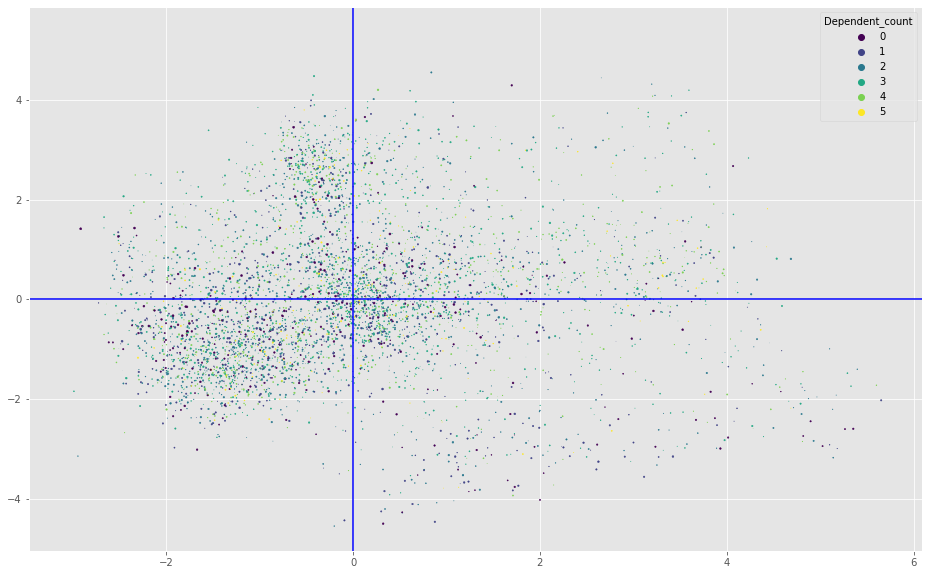

In [33]:
plt.figure(figsize=(16,10))
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=Y)
labels = np.unique(Y)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels, title='Dependent_count')

plt.axhline(0, color='b')
plt.axvline(0, color='b')
plt.show()

isolation Forest is most suitable for detecting anomaly or outliers in higher dimentional data.

[plotly.express.scatter_3d](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

In [ ]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

#px.scatter_3d(x = "x_pca[:,0]", y = "x_pca[:,1]",z = "x_pca[:,2]", data_frame= x_pca, color= Y)
px.scatter_3d(x_pca, x_pca[:,0], x_pca[:,1], x_pca[:,2], color= Y)


In [31]:
type(x_pca[:,0])

numpy.ndarray